**Report-large**
Title + Desc

*  trying on: 10 , 20 30 , 40

*   Best result cat 1 Personal: **10**
*   Best result cat 2 Physical: **30**
*   Best result cat 3 Cybersecurity: **40**


calculating the accuracy



*   input -  keywords_with_generated_topic# (from-BestNaming) + LabeledDataset_target_#
*   Output - rule_mapping#_with_preprocessed_keywords_#_NOACTION_LM.csv



# lib

In [ ]:

!pip install sentence-transformers

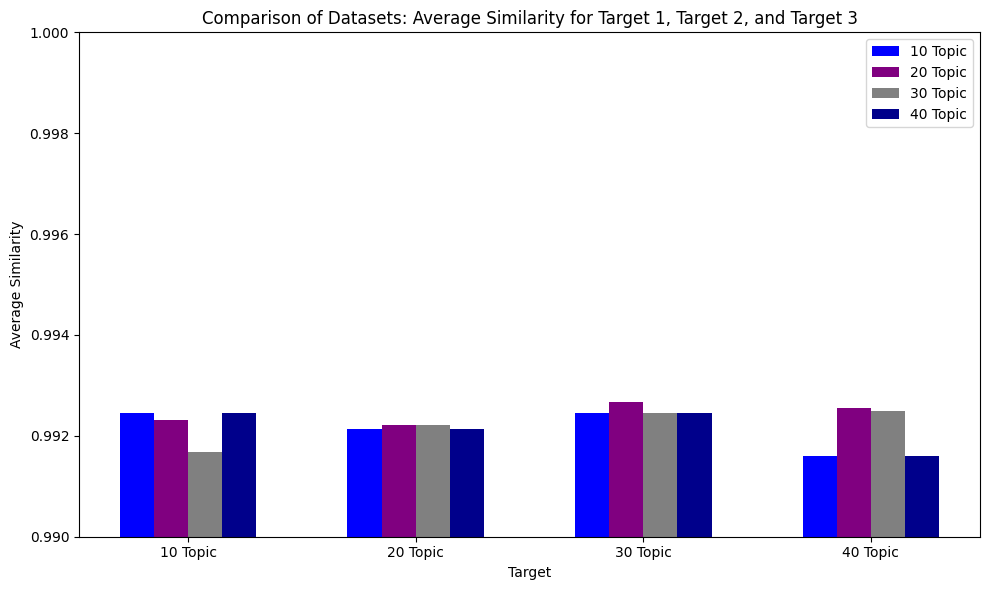

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data_target_1 = {
    'Dataset': ['10 Topic', '20 Topic', '30 Topic', '40 Topic'],
    'Average Similarity': [0.992455, 0.992143, 0.992455, 0.991591]
}

data_target_2 = {
    'Dataset': ['10 Topic', '20 Topic', '30 Topic', '40 Topic'],
    'Average Similarity': [0.992314, 0.992221, 0.992672, 0.992544]
}
import matplotlib.pyplot as plt
import pandas as pd

# Data
data_target_1 = {
    'Dataset': ['10 Topic', '20 Topic', '30 Topic', '40 Topic'],
    'Average Similarity': [0.992455, 0.992143, 0.992455, 0.991591]
}

data_target_2 = {
    'Dataset': ['10 Topic', '20 Topic', '30 Topic', '40 Topic'],
    'Average Similarity': [0.992314, 0.992221, 0.992672, 0.992544]
}

data_target_3 = {
    'Dataset': ['10 Topic', '20 Topic', '30 Topic', '40 Topic'],
    'Average Similarity': [0.991674, 0.992222, 0.992462, 0.992490]
}

# Create dataframes
df_target_1 = pd.DataFrame(data_target_1)
df_target_2 = pd.DataFrame(data_target_2)
df_target_3 = pd.DataFrame(data_target_3)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.15
x = range(4)  # 4 bars per target (10, 20, 30, 40 topics)

# Set x positions for each target
x_target_1 = [i - width * 1.5 for i in x]
x_target_2 = [i - width * 0.5 for i in x]
x_target_3 = [i + width * 0.5 for i in x]
x_target_4 = [i + width * 1.5 for i in x]

# Bar plot for each dataset with specific colors for each target
ax.bar(x_target_1, df_target_1['Average Similarity'], width=width, label='10 Topic', color='blue')
ax.bar(x_target_2, df_target_2['Average Similarity'], width=width, label='20 Topic', color='purple')
ax.bar(x_target_3, df_target_3['Average Similarity'], width=width, label='30 Topic', color='grey')
ax.bar(x_target_4, df_target_1['Average Similarity'], width=width, label='40 Topic', color='darkblue')

# Labeling
ax.set_xlabel('Target')
ax.set_ylabel('Average Similarity')
ax.set_title('Comparison of Datasets: Average Similarity for Target 1, Target 2, and Target 3')

# Adjusting the x-axis positions for targets
ax.set_xticks([i for i in range(4)])  # Set x positions for the targets
ax.set_xticklabels(['10 Topic', '20 Topic', '30 Topic', '40 Topic'])  # Topics for each target

# Adjusting the y-axis range to 0.99 to 1
ax.set_ylim(0.99, 1)

# Adding legends
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

data_target_3 = {
    'Dataset': ['10 Topic', '20 Topic', '30 Topic', '40 Topic'],
    'Average Similarity': [0.991674, 0.992222, 0.992462, 0.992490]
}

# Create dataframes
df_target_1 = pd.DataFrame(data_target_1)
df_target_2 = pd.DataFrame(data_target_2)
df_target_3 = pd.DataFrame(data_target_3)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.15
x = range(4)  # 4 bars per target (10, 20, 30, 40 topics)

# Set x positions for each target
x_target_1 = [i - width * 1.5 for i in x]
x_target_2 = [i - width * 0.5 for i in x]
x_target_3 = [i + width * 0.5 for i in x]
x_target_4 = [i + width * 1.5 for i in x]

# Bar plot for each dataset with specific colors for each target
ax.bar(x_target_1, df_target_1['Average Similarity'], width=width, label='10 Topic', color='blue')
ax.bar(x_target_2, df_target_2['Average Similarity'], width=width, label='20 Topic', color='purple')
ax.bar(x_target_3, df_target_3['Average Similarity'], width=width, label='30 Topic', color='grey')
ax.bar(x_target_4, df_target_1['Average Similarity'], width=width, label='40 Topic', color='darkblue')

# Labeling
ax.set_xlabel('Target')
ax.set_ylabel('Average Similarity')
ax.set_title('Comparison of Datasets: Average Similarity for Target 1, Target 2, and Target 3')

# Adjusting the x-axis positions for targets
ax.set_xticks([i for i in range(4)])  # Set x positions for the targets
ax.set_xticklabels(['10 Topic', '20 Topic', '30 Topic', '40 Topic'])  # Topics for each target

# Adjusting the y-axis range to 0.99 to 1
ax.set_ylim(0.99, 1)

# Adding legends
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



# Cat 1 mapping  **Personal**

In [ ]:
# -------------------- .. 10 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):  # Handle NaN or float cases
        text = ''
    text = re.sub(r'\W', ' ', text.lower())  # Remove special characters
    words = word_tokenize(text)  # Tokenize the words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    # Lemmatize the words
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic1_names_10_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_1.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 20 .. Mapp


import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic1_names_20_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_1.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping1_with_preprocessed_keywords_20_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 30 .. Mapp


import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic1_names_30_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_1.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping1_with_preprocessed_keywords_30_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 40 .. Mapp


import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk



# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic1_names_40_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_1.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping1_with_preprocessed_keywords_40_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

# Accuracy C1

In [ ]:
# Uninstall current pandas
!pip uninstall -y pandas

# Install the compatible version of pandas
!pip install pandas==2.2.2

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)


In [ ]:
# Uninstall pandas and numpy
!pip uninstall -y pandas numpy

# Install specific compatible versions
!pip install numpy==1.23.5 pandas==2.2.2

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: numpy 2.1.2
Uninstalling numpy-2.1.2:
  Successfully uninstalled numpy-2.1.2
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.8 MB/s eta 0:00:00
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.24.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.87 requires numpy>=1.24.1, but you have numpy 1.23.

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Function to upload files
def upload_files():
    uploaded = files.upload()
    return uploaded

# Load datasets with error handling
def load_dataset(file_path):
    try:
        dataset = pd.read_csv(file_path)
        if dataset.empty:
            print(f"{file_path} is empty.")
            return None
        return dataset
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Upload files
upload_files()

# Load datasets
dataset1 = load_dataset('rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv')
dataset2 = load_dataset('rule_mapping1_with_preprocessed_keywords_20_NOACTION_LM.csv')
dataset3 = load_dataset('rule_mapping1_with_preprocessed_keywords_30_NOACTION_LM.csv')
dataset4 = load_dataset('rule_mapping1_with_preprocessed_keywords_40_NOACTION_LM.csv')

# Function to analyze each dataset
def analyze_dataset(dataset):
    if dataset is None:
        return None, None

    similarity_column = 'Similarity Score' in dataset.columns
    match_quality_column = 'Match Quality' in dataset.columns

    average_similarity = dataset['Similarity Score'].mean() if similarity_column else None
    match_quality = dataset['Match Quality'].value_counts() if match_quality_column else None

    if match_quality is not None and match_quality.sum() > 0:
        accuracy = (match_quality.get('High Confidence', 0) / match_quality.sum() * 100)
    else:
        accuracy = None

    return average_similarity, accuracy

# Analyze all datasets
avg_similarity_1, accuracy_1 = analyze_dataset(dataset1)
avg_similarity_2, accuracy_2 = analyze_dataset(dataset2)
avg_similarity_3, accuracy_3 = analyze_dataset(dataset3)
avg_similarity_4, accuracy_4 = analyze_dataset(dataset4)

# Create a DataFrame to compare results
results = pd.DataFrame({
    'Dataset': ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'],
    'Average Similarity': [avg_similarity_1, avg_similarity_2, avg_similarity_3, avg_similarity_4],
    'Accuracy (%)': [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
})

# Determine the best dataset based on average similarity score
best_dataset = results.loc[results['Average Similarity'].idxmax()]

# Print results
print("\nComparison of Datasets:")
print(results)

print(f"\nThe best dataset to use is: {best_dataset['Dataset']} "
      f"with an average similarity score of {best_dataset['Average Similarity']} "
      f"and accuracy of {best_dataset['Accuracy (%)']}%.")

Saving rule_mapping_with_preprocessed_keywords_10_NOACTION_LM.csv to rule_mapping_with_preprocessed_keywords_10_NOACTION_LM (1).csv
Saving rule_mapping_with_preprocessed_keywords_20_NOACTION_LM.csv to rule_mapping_with_preprocessed_keywords_20_NOACTION_LM (1).csv
Saving rule_mapping_with_preprocessed_keywords_30_NOACTION_LM.csv to rule_mapping_with_preprocessed_keywords_30_NOACTION_LM (1).csv
Saving rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv to rule_mapping_with_preprocessed_keywords_40_NOACTION_LM (1).csv
Saving rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv to rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM (2).csv
Saving rule_mapping1_with_preprocessed_keywords_20_NOACTION_LM.csv to rule_mapping1_with_preprocessed_keywords_20_NOACTION_LM (2).csv
Saving rule_mapping1_with_preprocessed_keywords_30_NOACTION_LM.csv to rule_mapping1_with_preprocessed_keywords_30_NOACTION_LM (2).csv
Saving rule_mapping1_with_preprocessed_keywords_40_NOACTION_LM.csv to 

# Cat 2 mapping **Physical**

In [ ]:
# -------------------- .. 10 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic2_names_10_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_2.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping2_with_preprocessed_keywords_10_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 20 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic2_names_20_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_2.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping2_with_preprocessed_keywords_20_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 30 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic2_names_30_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_2.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping2_with_preprocessed_keywords_30_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 40 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic2_names_40_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_2.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping2_with_preprocessed_keywords_40_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

# Accurcy C2

In [ ]:

import pandas as pd

# Load datasets with error handling
def load_dataset(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load all datasets
dataset1 = load_dataset('rule_mapping2_with_preprocessed_keywords_10_NOACTION_LM.csv')
dataset2 = load_dataset('rule_mapping2_with_preprocessed_keywords_20_NOACTION_LM.csv')
dataset3 = load_dataset('rule_mapping2_with_preprocessed_keywords_30_NOACTION_LM.csv')
dataset4 = load_dataset('rule_mapping2_with_preprocessed_keywords_40_NOACTION_LM.csv')

# Function to analyze each dataset
def analyze_dataset(dataset):
    if dataset is None:
        return None, None

    similarity_column = 'Similarity Score' in dataset.columns
    match_quality_column = 'Match Quality' in dataset.columns

    average_similarity = dataset['Similarity Score'].mean() if similarity_column else None
    match_quality = dataset['Match Quality'].value_counts() if match_quality_column else None

    accuracy = (match_quality.get('High Confidence', 0) / match_quality.sum() * 100) if match_quality is not None and match_quality.sum() > 0 else None

    return average_similarity, accuracy

# Analyze all datasets
avg_similarity_1, accuracy_1 = analyze_dataset(dataset1)
avg_similarity_2, accuracy_2 = analyze_dataset(dataset2)
avg_similarity_3, accuracy_3 = analyze_dataset(dataset3)
avg_similarity_4, accuracy_4 = analyze_dataset(dataset4)

# Create a DataFrame to compare results
results = pd.DataFrame({
    'Dataset': ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'],
    'Average Similarity': [avg_similarity_1, avg_similarity_2, avg_similarity_3, avg_similarity_4],
    'Accuracy (%)': [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
})

# Determine the best dataset based on average similarity score
best_dataset = results.loc[results['Average Similarity'].idxmax()]

# Print results
print("\nComparison of Datasets:")
print(results)

print(f"\nThe best dataset to use is: {best_dataset['Dataset']} "
      f"with an average similarity score of {best_dataset['Average Similarity']} "
      f"and accuracy of {best_dataset['Accuracy (%)']}%.")


Comparison of Datasets:
     Dataset  Average Similarity  Accuracy (%)
0  Dataset 1            0.992314         100.0
1  Dataset 2            0.992221         100.0
2  Dataset 3            0.992672         100.0
3  Dataset 4            0.992544         100.0

The best dataset to use is: Dataset 3 with an average similarity score of 0.9926722601636664 and accuracy of 100.0%.


# Cat 3 mapping **Cybersecurity**

In [ ]:
# -------------------- .. 10 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic_names_10_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_3.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping_with_preprocessed_keywords_10_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Results saved to Cat3_Mapping_keywords_10_topic.csv


In [ ]:
# -------------------- .. 20 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic_names_20_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_3.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping_with_preprocessed_keywords_20_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 30 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic_names_30_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_3.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping_with_preprocessed_keywords_30_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

In [ ]:
# -------------------- .. 40 .. Mapp

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load spaCy's English model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lowercase, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\W', ' ', text.lower())
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    doc = nlp(" ".join(words))
    return ' '.join(token.lemma_ for token in doc)

# Load datasets
keywords_df = pd.read_csv('keywords_with_generated_topic_names_40_L.csv')
labeled_dataset_df = pd.read_csv('LabeledDataset_target_3.csv')

# Load the RoBERTa model
model = SentenceTransformer('roberta-large')

# Preprocess Keywords
keywords_df['Processed Keywords'] = keywords_df['Keywords'].apply(preprocess_text)
keywords = keywords_df['Processed Keywords'].tolist()

# Fill missing values in fields before concatenation
labeled_dataset_df.fillna({ 'title': '', 'desc': ''}, inplace=True)

# Concatenate and preprocess title and description fields
labeled_dataset_df['Title + Description'] = (
    labeled_dataset_df['title'] + ' ' + labeled_dataset_df['desc']
)

# Apply preprocessing to concatenated fields
labeled_dataset_df['Processed Title + Description'] = labeled_dataset_df['Title + Description'].apply(preprocess_text)
combined_fields = labeled_dataset_df['Processed Title + Description'].tolist()

# Generate embeddings
keywords_embeddings = model.encode(keywords, convert_to_tensor=True)
combined_embeddings = model.encode(combined_fields, convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.pytorch_cos_sim(keywords_embeddings, combined_embeddings)

# Determine best matches and confidence scores
best_matches = cosine_scores.argmax(dim=0).tolist()
best_scores = cosine_scores.max(dim=0).values.tolist()

# Add results to the labeled dataset
labeled_dataset_df['Best Matched Keywords'] = [keywords[idx] for idx in best_matches]
labeled_dataset_df['Similarity Score'] = best_scores
labeled_dataset_df['Match Quality'] = ['High Confidence' if score >= 0.5 else 'Low Confidence' for score in best_scores]
labeled_dataset_df['Generated Topic Name'] = [keywords_df.loc[idx, 'Generated Topic Name'] for idx in best_matches]

# Save results to a CSV file
output_file_path = 'rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv'
labeled_dataset_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

# Accurcy C3

In [ ]:
# THE Best numbur of topic

import pandas as pd

# Load datasets with error handling
def load_dataset(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load all datasets
dataset1 = load_dataset('rule_mapping_with_preprocessed_keywords_10_NOACTION_LM.csv')
dataset2 = load_dataset('rule_mapping_with_preprocessed_keywords_20_NOACTION_LM.csv')
dataset3 = load_dataset('rule_mapping_with_preprocessed_keywords_30_NOACTION_LM.csv')
dataset4 = load_dataset('rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv')

# Function to analyze each dataset
def analyze_dataset(dataset):
    if dataset is None:
        return None, None

    similarity_column = 'Similarity Score' in dataset.columns
    match_quality_column = 'Match Quality' in dataset.columns

    average_similarity = dataset['Similarity Score'].mean() if similarity_column else None
    match_quality = dataset['Match Quality'].value_counts() if match_quality_column else None

    accuracy = (match_quality.get('High Confidence', 0) / match_quality.sum() * 100) if match_quality is not None and match_quality.sum() > 0 else None

    return average_similarity, accuracy

# Analyze all datasets
avg_similarity_1, accuracy_1 = analyze_dataset(dataset1)
avg_similarity_2, accuracy_2 = analyze_dataset(dataset2)
avg_similarity_3, accuracy_3 = analyze_dataset(dataset3)
avg_similarity_4, accuracy_4 = analyze_dataset(dataset4)

# Create a DataFrame to compare results
results = pd.DataFrame({
    'Dataset': ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'],
    'Average Similarity': [avg_similarity_1, avg_similarity_2, avg_similarity_3, avg_similarity_4],
    'Accuracy (%)': [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
})

# Determine the best dataset based on average similarity score
best_dataset = results.loc[results['Average Similarity'].idxmax()]

# Print results
print("\nComparison of Datasets:")
print(results)

print(f"\nThe best dataset to use is: {best_dataset['Dataset']} "
      f"with an average similarity score of {best_dataset['Average Similarity']} "
      f"and accuracy of {best_dataset['Accuracy (%)']}%.")


Comparison of Datasets:
     Dataset  Average Similarity  Accuracy (%)
0  Dataset 1            0.991674         100.0
1  Dataset 2            0.992222         100.0
2  Dataset 3            0.992462         100.0
3  Dataset 4            0.992490         100.0

The best dataset to use is: Dataset 4 with an average similarity score of 0.9924899582278022 and accuracy of 100.0%.


# **Combined Dataset**

In [ ]:
# combining
#rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv
#rule_mapping2_with_preprocessed_keywords_30_NOACTION_LM.csv
#rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv

import pandas as pd

# Load datasets with error handling
def load_dataset(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None
# Load datasets
dataset1 = load_dataset('rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv') #cat 1
dataset2 = load_dataset('rule_mapping2_with_preprocessed_keywords_30_NOACTION_LM.csv') #cat 2
dataset3 = load_dataset('rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv')  #cat 3

# Combine datasets by concatenation
combined_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

# Optionally, drop duplicates if needed
combined_dataset.drop_duplicates(inplace=True)

# Save the output to a CSV file
combined_dataset.to_csv('combined_dataset.csv', index=False)

print("Combined dataset saved as 'combined_dataset.csv'")

Combined dataset saved as 'combined_dataset.csv'


In [ ]:
# combining
#rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv
#rule_mapping2_with_preprocessed_keywords_30_NOACTION_LM.csv
#rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv
import pandas as pd

# Load datasets with error handling
def load_dataset(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load datasets
dataset1 = load_dataset('rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv')
dataset2 = load_dataset('rule_mapping2_with_preprocessed_keywords_30_NOACTION_LM.csv')
dataset3 = load_dataset('rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv')

# Combine datasets by concatenation
combined_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

# Optionally, drop duplicates if needed
combined_dataset.drop_duplicates(inplace=True)

# Split the dataset into 75% for training and 25% for testing
train_size = int(0.75 * len(combined_dataset))
combined_dataset_training = combined_dataset[:train_size]
combined_dataset_testing = combined_dataset[train_size:]

# Save the training and testing datasets to CSV files
combined_dataset_training.to_csv('combined_dataset_training.csv', index=False)
combined_dataset_testing.to_csv('combined_dataset_testing.csv', index=False)

print("Training and testing datasets saved as 'combined_dataset_training.csv' and 'combined_dataset_testing.csv'")


Training and testing datasets saved as 'combined_dataset_training.csv' and 'combined_dataset_testing.csv'


In [ ]:
#correct split of thedataset random

import pandas as pd
from sklearn.model_selection import train_test_split

# Load datasets with error handling
def load_dataset(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load datasets
dataset1 = load_dataset('rule_mapping1_with_preprocessed_keywords_10_NOACTION_LM.csv')
dataset2 = load_dataset('rule_mapping2_with_preprocessed_keywords_30_NOACTION_LM.csv')
dataset3 = load_dataset('rule_mapping_with_preprocessed_keywords_40_NOACTION_LM.csv')

# Combine datasets by concatenation
combined_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

# Optionally, drop duplicates if needed
combined_dataset.drop_duplicates(inplace=True)

# Split the dataset into 75% for training and 25% for testing, randomly
combined_dataset_training, combined_dataset_testing = train_test_split(combined_dataset, test_size=0.25, random_state=42)

# Save the training and testing datasets to CSV files
combined_dataset_training.to_csv('combined_dataset_75training.csv', index=False)
combined_dataset_testing.to_csv('combined_dataset_25testing.csv', index=False)

print("Training and testing datasets saved as 'combined_dataset_training.csv' and 'combined_dataset_testing.csv'")


Training and testing datasets saved as 'combined_dataset_training.csv' and 'combined_dataset_testing.csv'
